In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/smart_home_device_usage_data.csv')

In [3]:
df.head(10)

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
5,6,Thermostat,3.422127,5.038625,1,0,3,1
6,7,Security System,21.065640,2.229344,0,0,56,0
7,8,Security System,23.317096,2.791421,0,0,53,0
8,9,Security System,4.663108,1.780082,1,2,23,1
9,10,Camera,17.468553,7.212756,1,4,58,0


In [4]:
df.drop('UserID',axis=1,inplace=True)

<Axes: xlabel='DeviceType', ylabel='UsageHoursPerDay'>

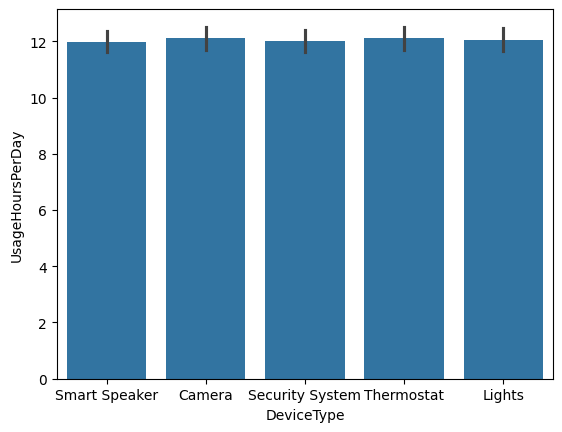

In [5]:
sns.barplot(x='DeviceType',y='UsageHoursPerDay',data=df)

<Axes: xlabel='DeviceType', ylabel='UsageHoursPerDay'>

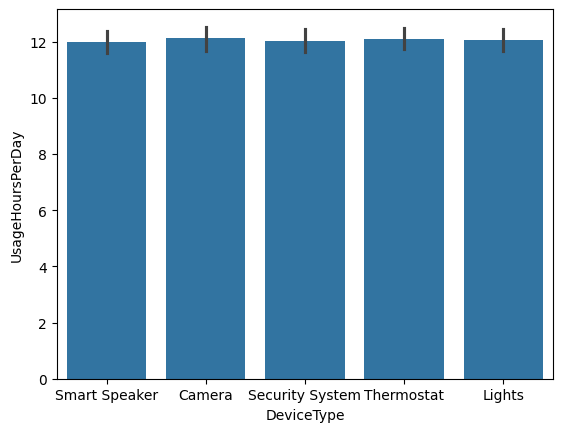

In [7]:
sns.barplot(x='DeviceType',y='UsageHoursPerDay',data=df)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['DeviceType'] = le.fit_transform(df['DeviceType'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DeviceType            5403 non-null   int64  
 1   UsageHoursPerDay      5403 non-null   float64
 2   EnergyConsumption     5403 non-null   float64
 3   UserPreferences       5403 non-null   int64  
 4   MalfunctionIncidents  5403 non-null   int64  
 5   DeviceAgeMonths       5403 non-null   int64  
 6   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 295.6 KB


In [10]:
df.isnull().sum()

DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [11]:
df.duplicated().sum()

0

<Axes: >

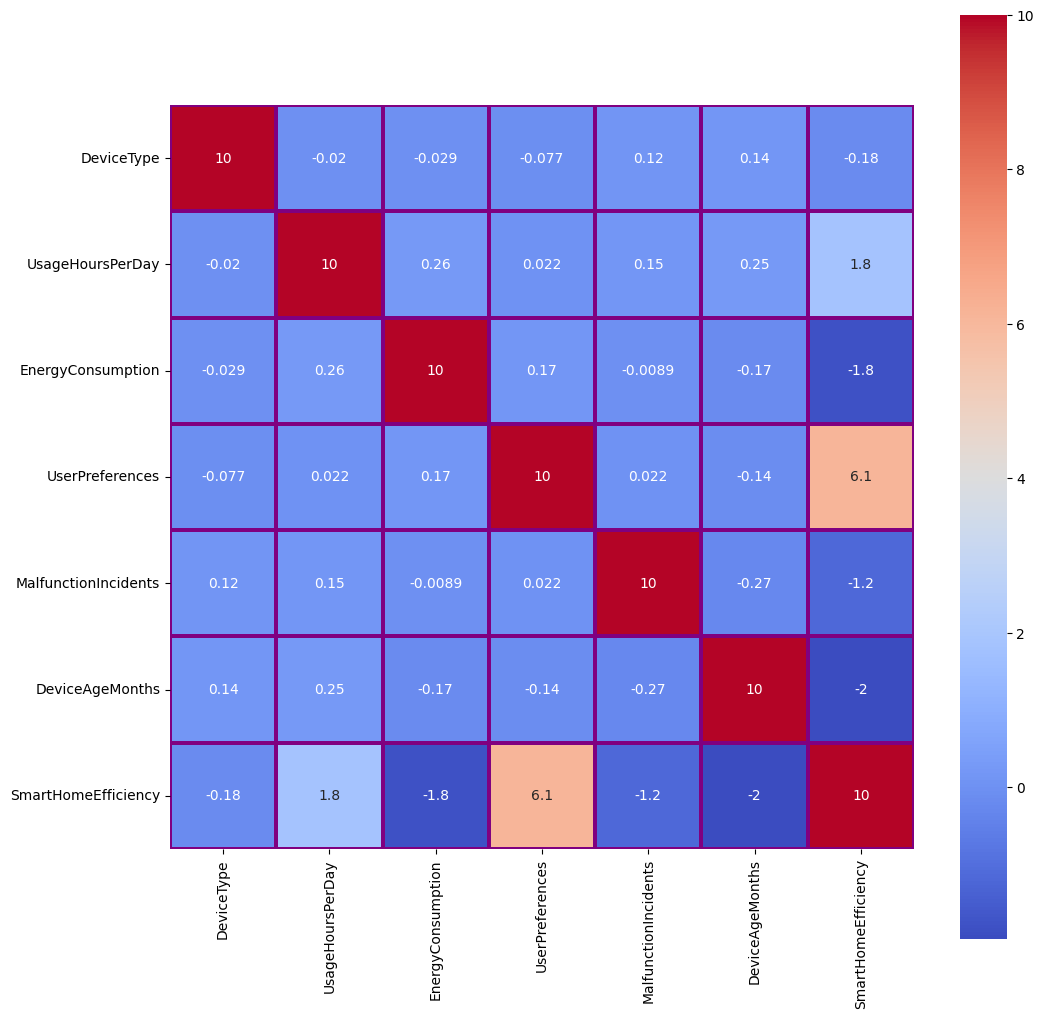

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()*10,annot=True,cmap='coolwarm',linewidths=1.5,linecolor='purple',square=True)

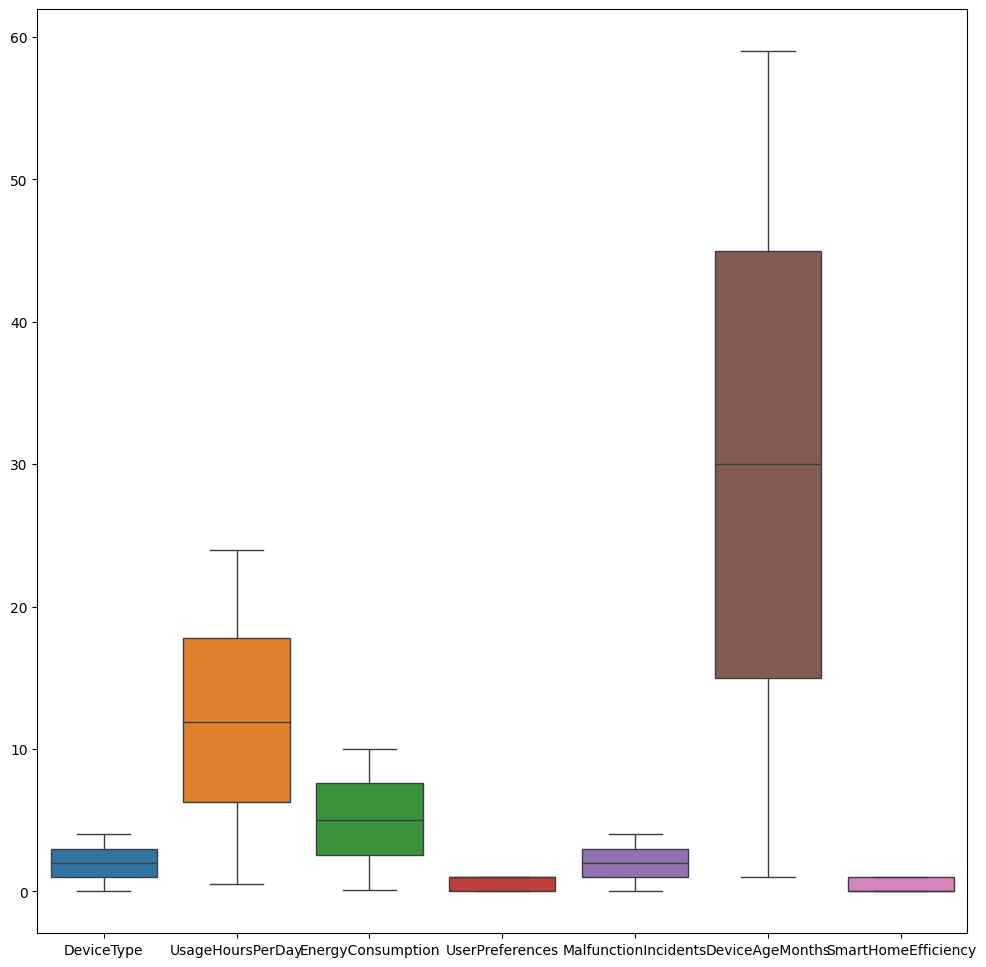

In [16]:
plt.figure(figsize=(12,12))
sns.boxplot(df)
plt.show()

In [17]:
df['SmartHomeEfficiency'].value_counts()

SmartHomeEfficiency
0    3368
1    2035
Name: count, dtype: int64

In [18]:
X= df.drop('SmartHomeEfficiency',axis=1)
y=df['SmartHomeEfficiency']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.32,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
!pip install lightgbm==3.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [24]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train,y_train)

LGBMClassifier()

In [25]:
y1_pred = lgb_classifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y1_pred))

0.9508386350491613


In [27]:
print(confusion_matrix(y_test,y1_pred))

[[1043   34]
 [  51  601]]


In [29]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1077
           1       0.95      0.92      0.93       652

    accuracy                           0.95      1729
   macro avg       0.95      0.95      0.95      1729
weighted avg       0.95      0.95      0.95      1729



In [30]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds = roc_curve(y_test,y1_pred)

In [31]:
fpr

array([0.        , 0.03156917, 1.        ])

In [32]:
tpr

array([0.        , 0.92177914, 1.        ])

In [33]:
from sklearn.metrics import roc_curve,roc_auc_score
roc_auc_score(y_test,y1_pred)

0.9451049837369198

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127]
}

In [36]:
grid_search = GridSearchCV(lgb.LGBMClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [31, 63, 127]})

In [37]:
y2_pred = grid_search.predict(X_test)

In [38]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 31}

In [39]:
grid_search.best_score_

0.9518241301970379

In [40]:
grid_search.best_estimator_

LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)